In [26]:
import pandas as pd 
from datetime import datetime    # To access datetime 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from math import sqrt
# from pandas import Series        # To work on series 
# import sklearn
# import statsmodels
# %matplotlib inline 
# import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (20,10)

In [27]:
data = pd.read_csv('2014-2019.csv')


In [28]:
data

,Datetime,PowerDemand
0,20-03-14 7:30,1526.40
1,20-03-14 7:45,1609.92
2,20-03-14 8:00,1621.44
3,20-03-14 8:15,1704.96
4,20-03-14 8:30,1785.60
...,...,...
196131,22-11-19 9:30,3686.40
196132,22-11-19 9:45,3634.56
196133,22-11-19 10:00,3651.84
196134,22-11-19 10:15,3640.32


In [29]:
data['Datetime'] = pd.to_datetime(data.Datetime, format='%d-%m-%y %H:%M')
data


,Datetime,PowerDemand
0,2014-03-20 07:30:00,1526.40
1,2014-03-20 07:45:00,1609.92
2,2014-03-20 08:00:00,1621.44
3,2014-03-20 08:15:00,1704.96
4,2014-03-20 08:30:00,1785.60
...,...,...
196131,2019-11-22 09:30:00,3686.40
196132,2019-11-22 09:45:00,3634.56
196133,2019-11-22 10:00:00,3651.84
196134,2019-11-22 10:15:00,3640.32


In [30]:
data.set_index('Datetime', inplace = True)


In [31]:
data


,PowerDemand
Datetime,
2014-03-20 07:30:00,1526.40
2014-03-20 07:45:00,1609.92
2014-03-20 08:00:00,1621.44
2014-03-20 08:15:00,1704.96
2014-03-20 08:30:00,1785.60
...,...
2019-11-22 09:30:00,3686.40
2019-11-22 09:45:00,3634.56
2019-11-22 10:00:00,3651.84


In [32]:
for count, value in enumerate(data.values, start=0):  # Can improve it.
    if value <= 400 or value >= 20000 or pd.isna(data.values[count]): #ps.isna checks if data is na
        data.values[count] = data.values[count - 168*4]  # Takes previous week's value

data = data.resample('15min').mean()
for count, value in enumerate(data.values, start=0):  # Can improve it.
    if value <= 400 or value >= 20000 or pd.isna(data.values[count]): #ps.isna checks if data is na
        data.values[count] = data.values[count - 168*4]  # Takes previous week's value

c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys
c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys


In [33]:
data=data['2015':]
data

,PowerDemand
Datetime,
2015-01-01 00:00:00,463.68
2015-01-01 00:15:00,440.64
2015-01-01 00:30:00,434.88
2015-01-01 00:45:00,443.52
2015-01-01 01:00:00,460.80
...,...
2019-11-22 09:30:00,3686.40
2019-11-22 09:45:00,3634.56
2019-11-22 10:00:00,3651.84


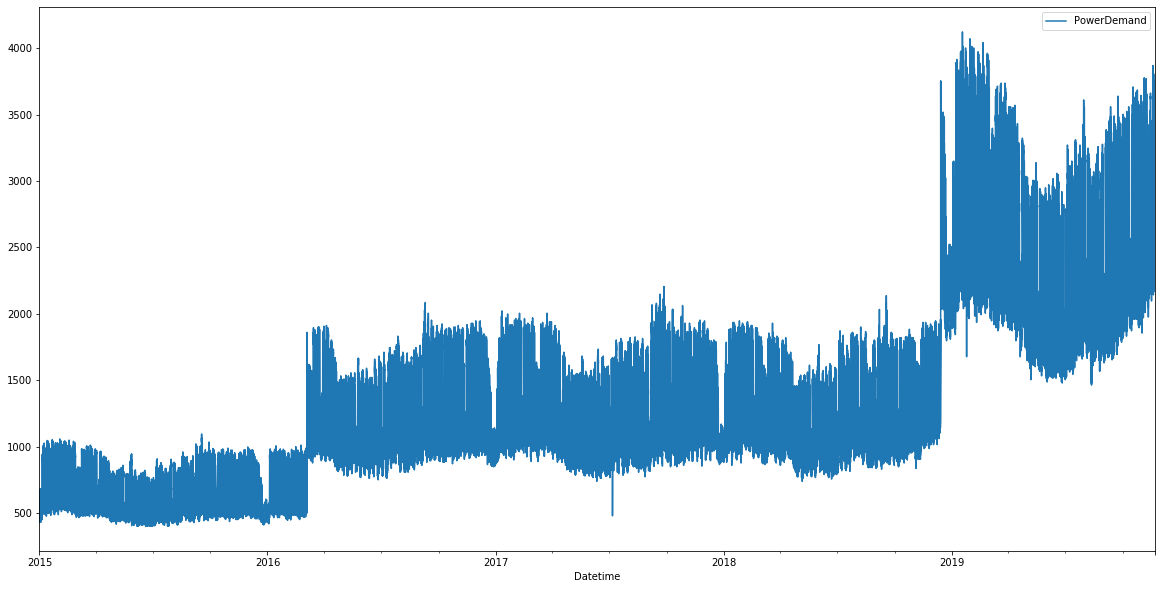

In [34]:
(data).plot()

In [35]:
data = data.resample('D').mean()
datacopy = data.copy()
data

,PowerDemand
Datetime,
2015-01-01,497.55000
2015-01-02,555.99000
2015-01-03,489.48000
2015-01-04,510.42000
2015-01-05,702.18000
...,...
2019-11-18,3048.60000
2019-11-19,2997.66000
2019-11-20,2958.90000


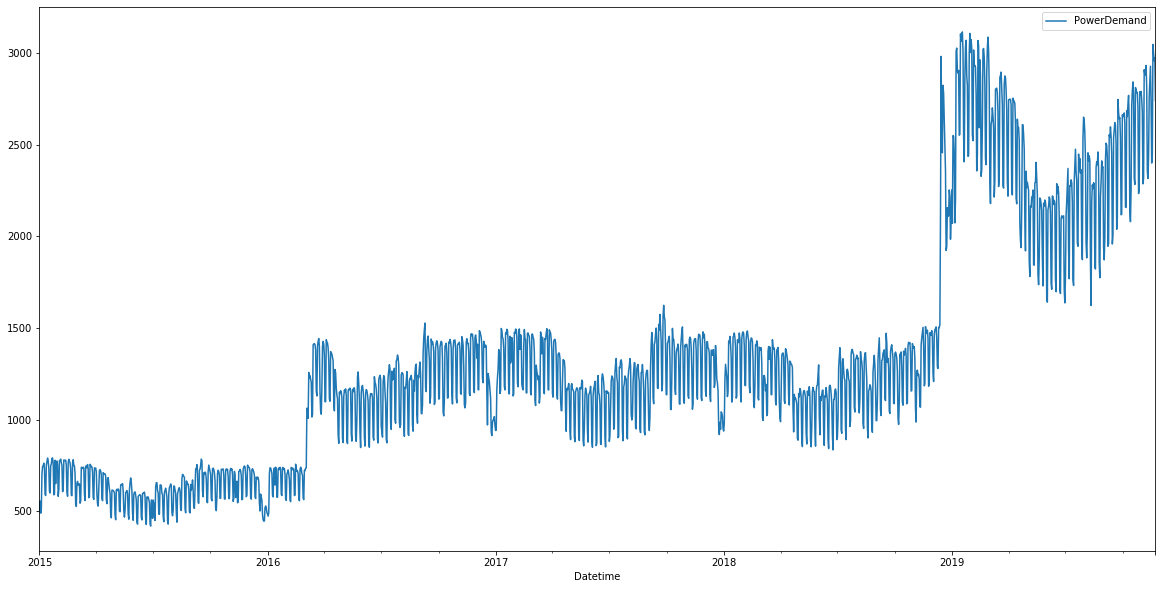

In [36]:
data.plot()

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [38]:
data_diff = data.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model
data_diff = data_diff[1:]
data_diff.tail()

,PowerDemand
Datetime,
2019-11-18,599.64000
2019-11-19,-50.94000
2019-11-20,-38.76000
2019-11-21,15.60000
2019-11-22,-232.33814


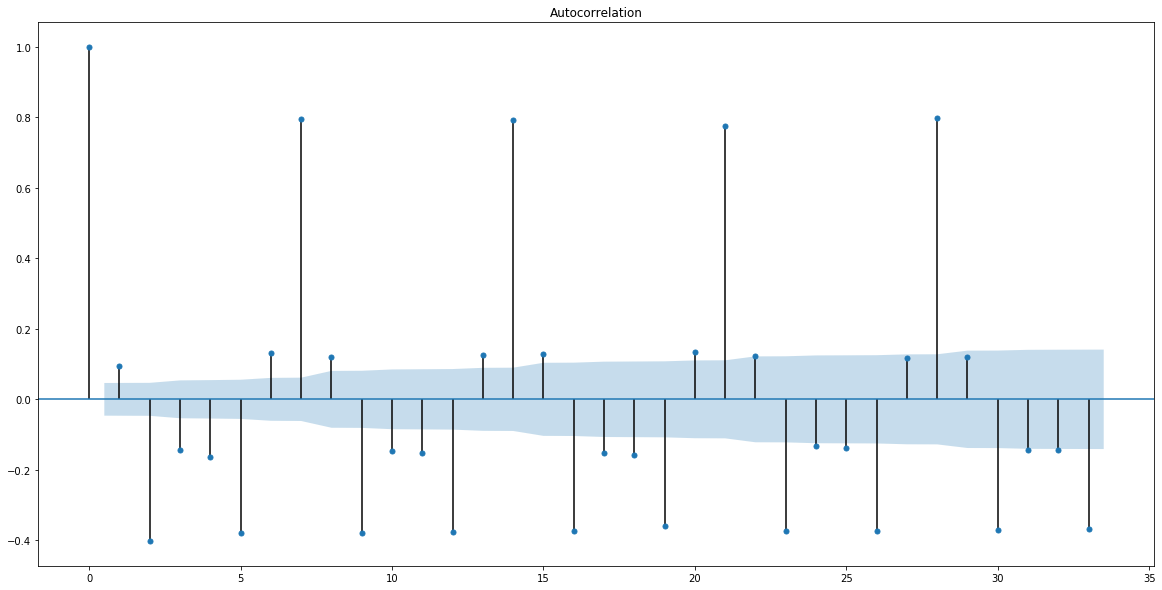

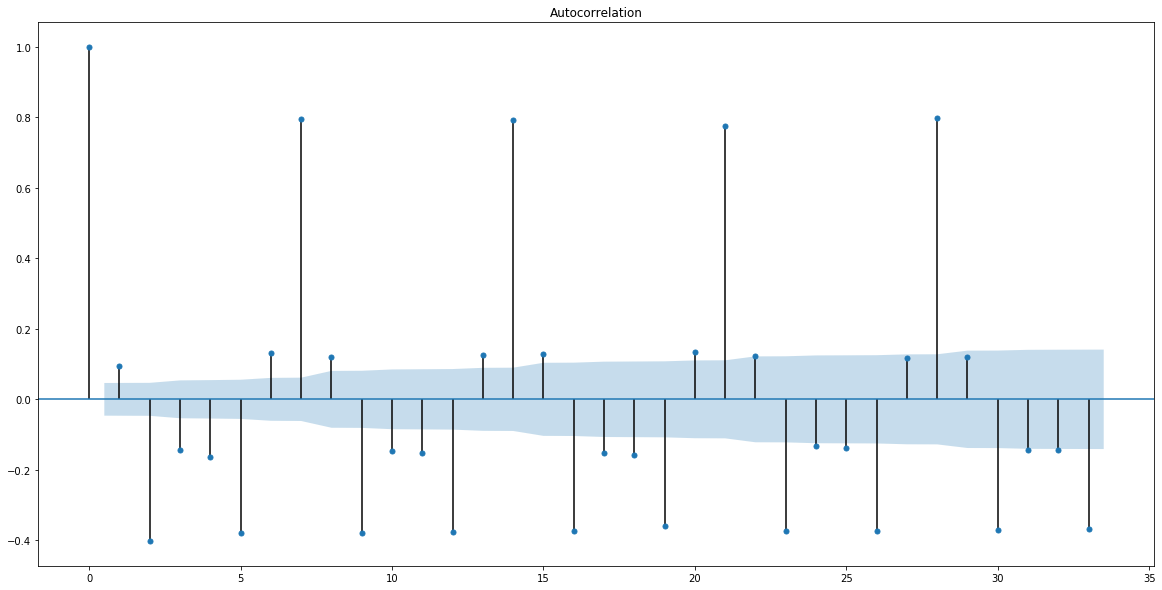

In [39]:
plot_acf(data_diff)

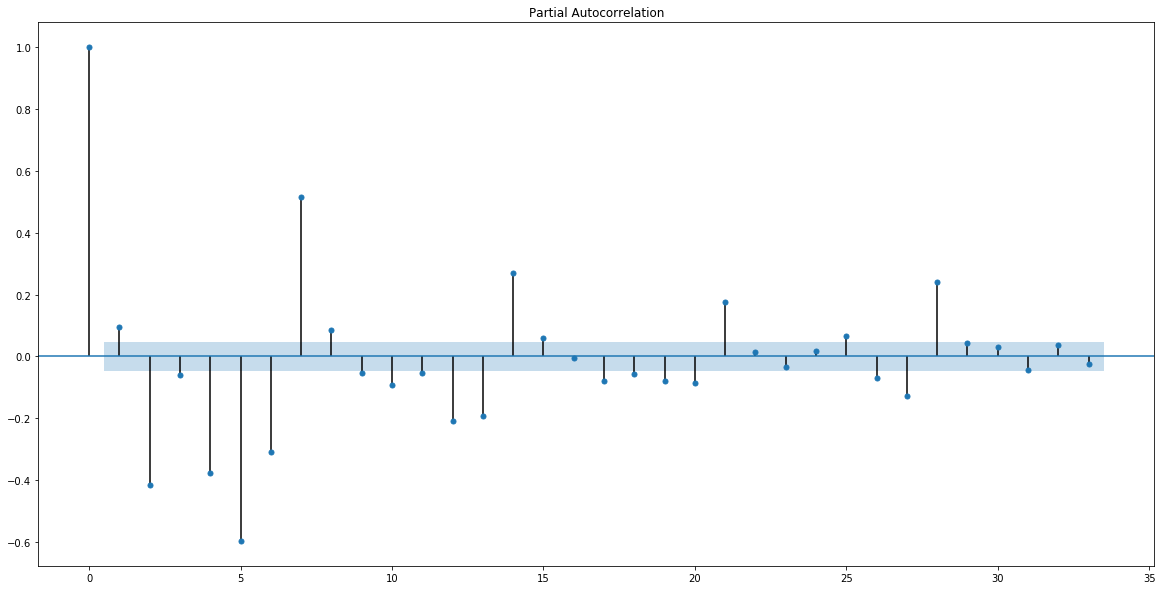

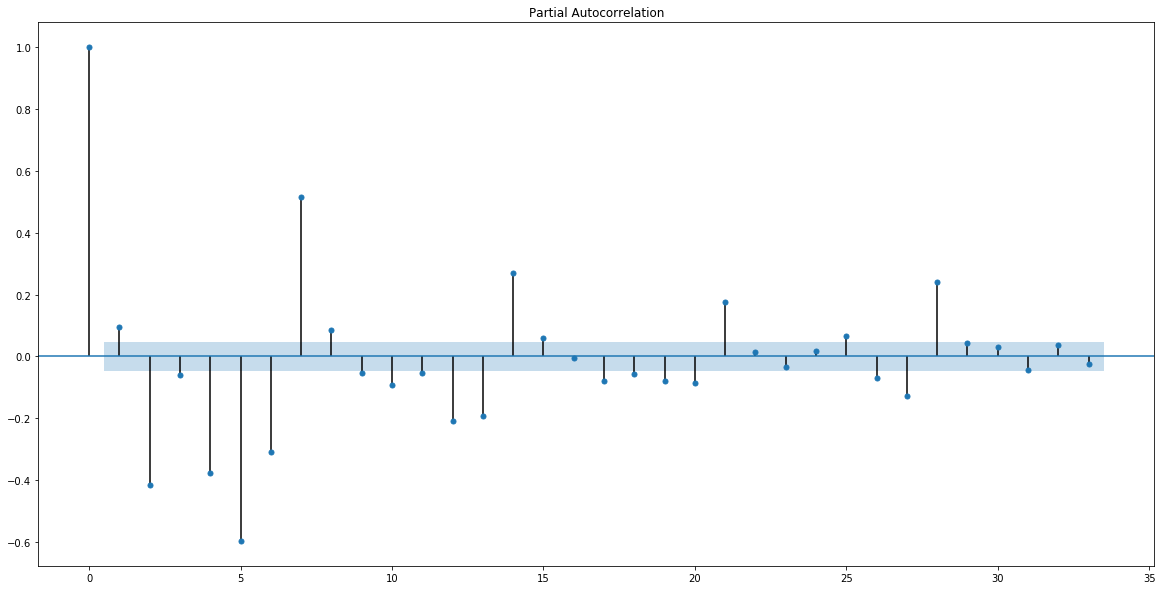

In [40]:
plot_pacf(data_diff)

In [41]:
X = data.copy()
split=int(len(X)-31) #Takes about 95% of data
train = X[:split]
test = X[split:]
predictions = []


# ARIMA model

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
""" Current Best Values For Previous 31 days
(6, 1, 7) 107
(11, 1, 13) 113
(8, 1, 8) 118
(12,1,11) 124
(5, 1 , 7) 122
(13, 1, 4) 122
(6, 1, 5) 122
(7,1,5) 125
(13, 1, 11) 125
(14, 1, 11) 127
"""
pdq =6,1,7
model_arima = ARIMA(train,order=(pdq))
model_arima_fit = model_arima.fit(disp=-1)
print(model_arima_fit.aic)

20184.61810387666


c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [44]:
predictions= model_arima_fit.forecast(steps=len(test))[0]
predictions = pd.Series(predictions, index=test.index)
predictions

Datetime
2019-10-23    2870.219149
2019-10-24    2871.004434
2019-10-25    2789.808980
2019-10-26    2323.844692
2019-10-27    2286.033035
2019-10-28    2747.423308
2019-10-29    2842.640482
2019-10-30    2891.204696
2019-10-31    2892.394670
2019-11-01    2811.376909
2019-11-02    2344.967893
2019-11-03    2307.247202
2019-11-04    2767.989842
2019-11-05    2863.572408
2019-11-06    2912.189229
2019-11-07    2913.785422
2019-11-08    2832.943917
2019-11-09    2366.092365
2019-11-10    2328.461169
2019-11-11    2788.556792
2019-11-12    2884.504263
2019-11-13    2933.172754
2019-11-14    2935.176686
2019-11-15    2854.510004
2019-11-16    2387.218107
2019-11-17    2349.674935
2019-11-18    2809.124161
2019-11-19    2905.436046
2019-11-20    2954.155274
2019-11-21    2956.568457
2019-11-22    2876.075174
Freq: D, dtype: float64

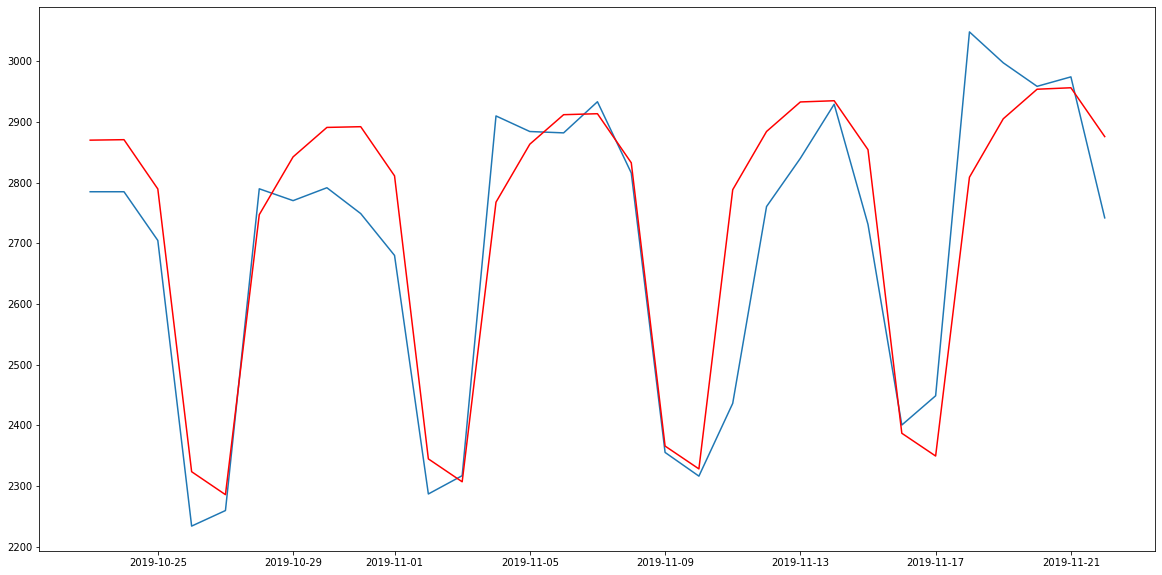

In [45]:
plt.plot(test)
plt.plot(predictions,color='red')

In [46]:
len(test) == len(predictions)

True

In [47]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
rmse

108.99408263791858

In [48]:
summation = list()
for i in test.values:
    for j in predictions.values:
        value = abs((i-j)/i)[0] #It returned an array
        summation.append(value)
    
MeanAbsolutePercentError = (sum(summation)/len(summation))*100
MeanAbsolutePercentError

# mape = np.mean(np.abs(fc_series.values - test.values)/np.abs(test.values))

10.149341471432276

In [49]:
model_arima_fit.summary()

c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.PowerDemand   No. Observations:                 1755
Model:                 ARIMA(6, 1, 7)   Log Likelihood              -10077.309
Method:                       css-mle   S.D. of innovations             74.616
Date:                Fri, 22 Nov 2019   AIC                          20184.618
Time:                        14:10:28   BIC                          20266.671
Sample:                    01-02-2015   HQIC                         20214.946
                         - 10-22-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0159      1.311      2.300      0.022       0.446       5.586
ar.L1.D.PowerDemand    -0.9997        nan        nan        nan         nan         nan
ar.L2.D.PowerDemand    -0.9988        nan        nan        nan         nan         nan
ar.L3.D.PowerDemand    -0.9996        nan        nan        nan         nan         nan
ar.L4.D.PowerDemand    -0.9985        nan        nan        nan         nan         nan
ar.L5.D.PowerDemand    -1.0002        nan        nan        nan         nan         nan
ar.L6.D.PowerDemand    -0.9993        nan        nan        nan         nan         nan
ma.L1.D.PowerDemand     0.8075      0.026     30.470      0.000       0.756       0.859
ma.L2.D.PowerDemand     0.7423      0.028     26.118      0.000       0.687       0.798
ma.L3.D.PowerDemand     0.7172      0.030     23.772      0.000       0.658       0.776
ma.L4.D.PowerDemand     0.6719      0.034     19.986      0.000       0.606       0.738
ma.L5.D.PowerDemand     0.6702      0.032     20.739      0.000       0.607       0.734
ma.L6.D.PowerDemand     0.6910      0.031     22.599      0.000       0.631       0.751
ma.L7.D.PowerDemand    -0.1821      0.026     -6.880      0.000      -0.234      -0.130
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6236           -0.7817j            1.0000           -0.1428
AR.2            0.6236           +0.7817j            1.0000            0.1428
AR.3           -0.9015           -0.4335j            1.0003           -0.4287
AR.4           -0.9015           +0.4335j            1.0003            0.4287
AR.5           -0.2225           -0.9749j            1.0000           -0.2857
AR.6           -0.2225           +0.9749j            1.0000            0.2857
MA.1           -0.9147           -0.4316j            1.0114           -0.4298
MA.2           -0.9147           +0.4316j            1.0114            0.4298
MA.3           -0.2278           -0.9946j            1.0204           -0.2858
MA.4           -0.2278           +0.9946j            1.0204            0.2858
MA.5            0.6529           -0.8086j            1.0393           -0.1419
MA.6            0.6529           +0.8086j            1.0393            0.1419
MA.7            4.7728           -0.0000j            4.7728           -0.0000
-----------------------------------------------------------------------------
"""

In [50]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit' is not defined

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
fc, se, conf= model_arima_fit.forecast(len(test), alpha = 0.05)
fc

In [ ]:
fc_series = pd.Series(fc, index=test.index)
fc_series.head()


In [ ]:
plt.plot(train['2019':], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()